## Disease Prediction

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Reading the Dataset

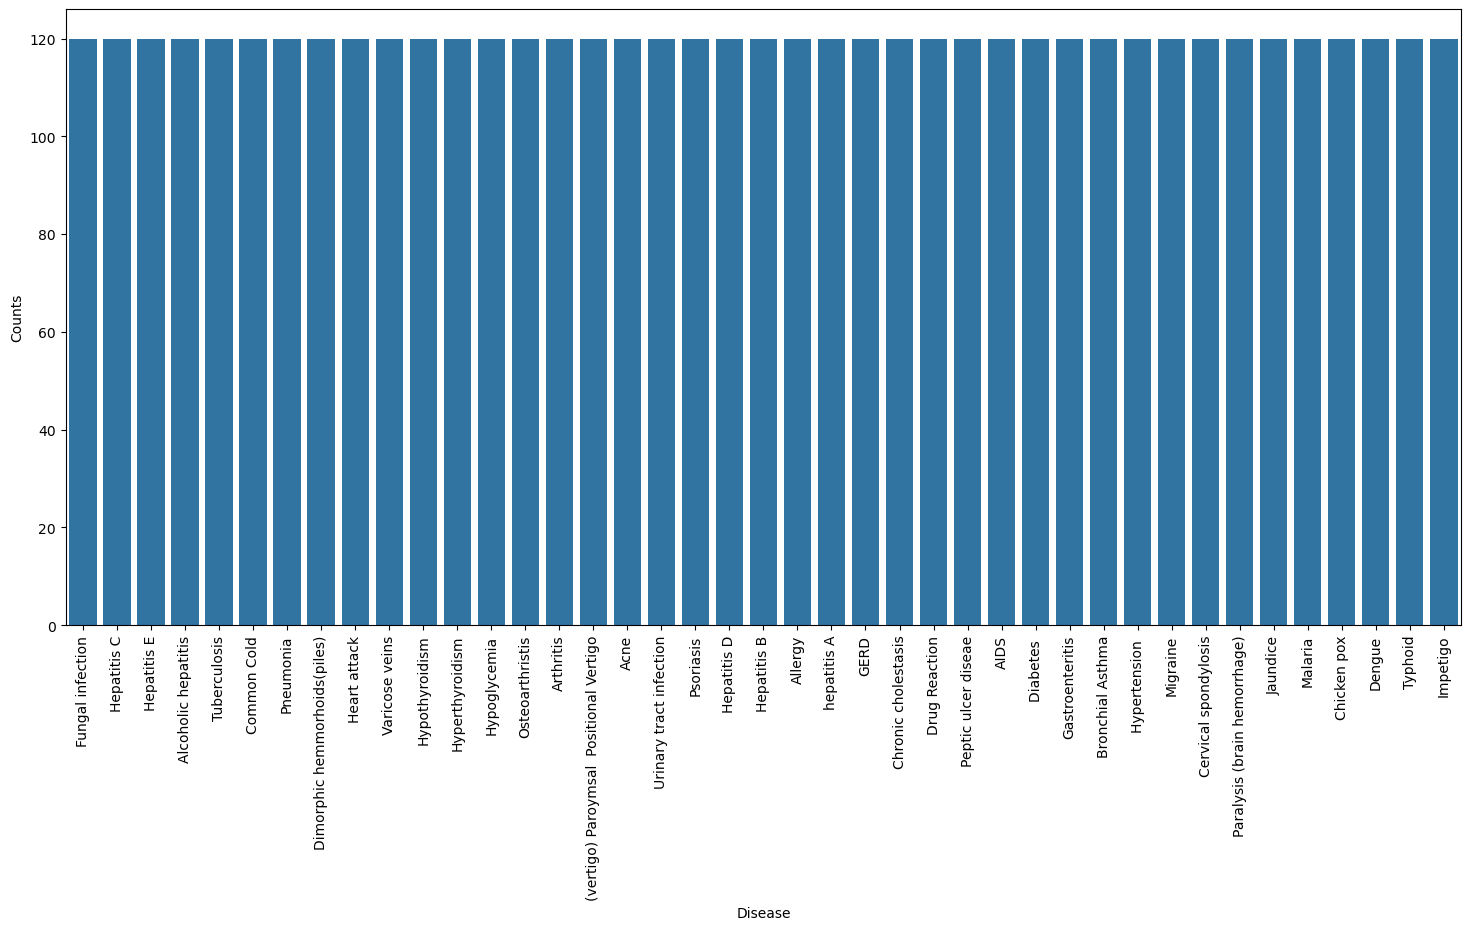

In [13]:
PATH = "../Data/Training.csv"
dataset = pd.read_csv(PATH).dropna(axis=1)

dieseas_counts = dataset["prognosis"].value_counts()
temp_DF = pd.DataFrame(
    {"Disease": dieseas_counts.index, "Counts": dieseas_counts.values}
)

plt.figure(figsize=(18, 8))
sb.barplot(x="Disease", y="Counts", data=temp_DF)
plt.xticks(rotation=90)
plt.show()

### Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["prognosis"] = encoder.fit_transform(dataset["prognosis"])
print(dataset["prognosis"])

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64
